In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fl_g13.config import RAW_DATA_DIR
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from collections import Counter

2025-04-16 14:38:54.771 | INFO     | fl_g13.config:<module>:11 - PROJ_ROOT path is: /home/massimiliano/Projects/fl-g13


## Load data

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])
cifar100_train = datasets.CIFAR100(root=RAW_DATA_DIR, train=True, download=True, transform=transform)
cifar100_test = datasets.CIFAR100(root=RAW_DATA_DIR, train=False, download=True, transform=transform)


## Dataset overview

In [4]:
print(f"Training samples: {len(cifar100_train)}")
print(f"Test samples: {len(cifar100_test)}")
print(f"Classes: {len(cifar100_train.classes)}")
print(f"First 5 classes: {cifar100_train.classes[:5]}")

Training samples: 50000
Test samples: 10000
Classes: 100
First 5 classes: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver']


## Display a few sample images

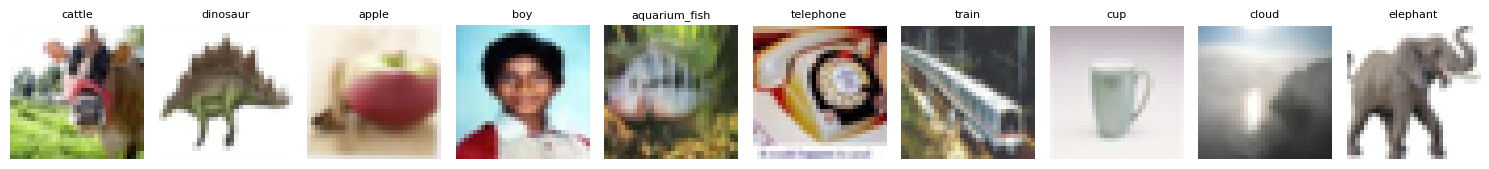

In [5]:
def show_samples(dataset, n=10):
    fig, axes = plt.subplots(1, n, figsize=(15, 2))
    for i in range(n):
        img, label = dataset[i]
        axes[i].imshow(np.transpose(img.numpy(), (1, 2, 0)))
        axes[i].axis('off')
        axes[i].set_title(dataset.classes[label], fontsize=8)
    plt.tight_layout()
    plt.show()

show_samples(cifar100_train)

## Class distribution

In [6]:
def get_class_distribution(dataset):
    labels = [label for _, label in dataset]
    return Counter(labels)

train_dist = get_class_distribution(cifar100_train)
test_dist = get_class_distribution(cifar100_test)

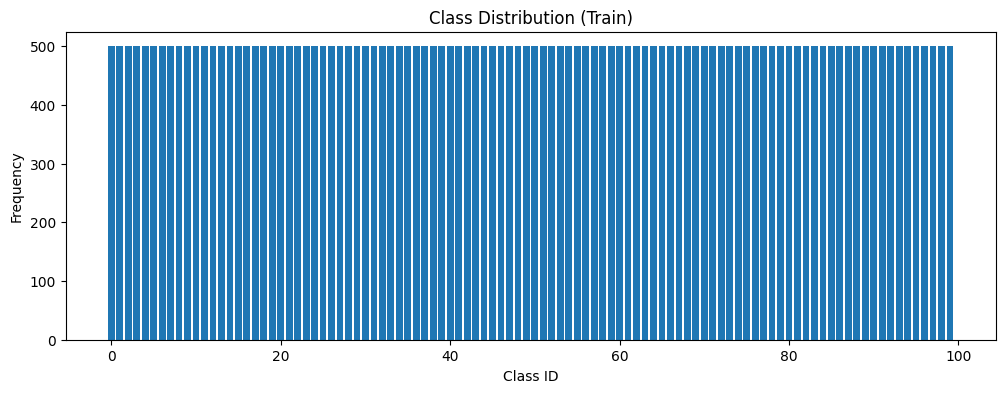

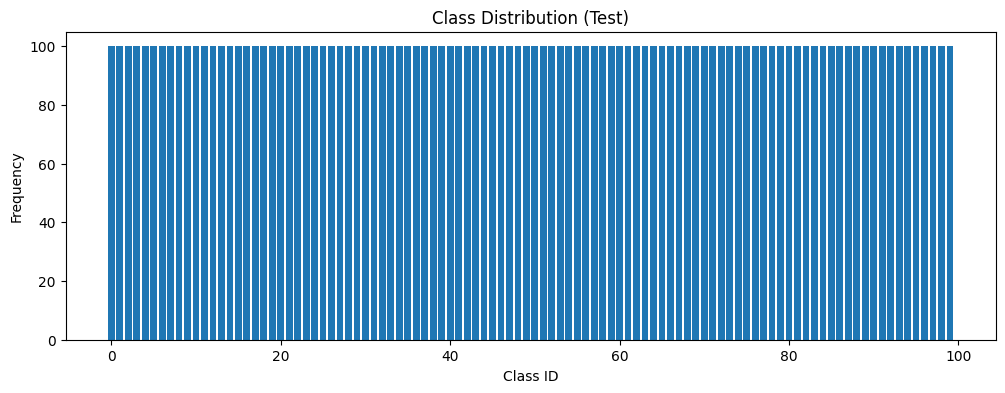

In [7]:
# Plot distribution
def plot_distribution(distribution, title):
    labels = list(range(100))
    counts = [distribution[l] for l in labels]
    plt.figure(figsize=(12, 4))
    plt.bar(labels, counts)
    plt.title(title)
    plt.xlabel("Class ID")
    plt.ylabel("Frequency")
    plt.show()

plot_distribution(train_dist, "Class Distribution (Train)")
plot_distribution(test_dist, "Class Distribution (Test)")

## Train, val split

In [8]:
from fl_g13.dataset import iid_sharding, non_iid_sharding, train_test_split, check_subset_distribution

In [9]:
### train val split
train_dataset, val_dataset = train_test_split(cifar100_train,train_ratio=0.8)

**Check distribution**

In [10]:
check_subset_distribution(val_dataset)

Counter({86: 100,
         85: 100,
         25: 100,
         68: 100,
         97: 100,
         15: 100,
         43: 100,
         70: 100,
         5: 100,
         31: 100,
         53: 100,
         80: 100,
         52: 100,
         41: 100,
         98: 100,
         96: 100,
         36: 100,
         51: 100,
         64: 100,
         48: 100,
         99: 100,
         87: 100,
         14: 100,
         11: 100,
         67: 100,
         37: 100,
         56: 100,
         34: 100,
         9: 100,
         71: 100,
         84: 100,
         16: 100,
         90: 100,
         77: 100,
         10: 100,
         30: 100,
         74: 100,
         18: 100,
         60: 100,
         45: 100,
         35: 100,
         8: 100,
         65: 100,
         72: 100,
         38: 100,
         19: 100,
         73: 100,
         95: 100,
         13: 100,
         2: 100,
         62: 100,
         82: 100,
         3: 100,
         32: 100,
         47: 100,
         81: 10

## I.I.D Sharding Split

In [11]:
## k client
k =10
clients_dataset= iid_sharding(cifar100_train,k)

In [12]:
check_subset_distribution(clients_dataset[0])

Counter({18: 65,
         98: 64,
         20: 62,
         83: 62,
         94: 59,
         39: 59,
         53: 58,
         49: 58,
         57: 58,
         33: 58,
         74: 58,
         93: 57,
         92: 57,
         5: 57,
         21: 57,
         66: 57,
         52: 57,
         41: 57,
         69: 56,
         10: 56,
         16: 55,
         1: 55,
         61: 55,
         82: 55,
         63: 54,
         72: 54,
         56: 54,
         87: 54,
         0: 54,
         38: 53,
         40: 53,
         50: 53,
         59: 53,
         45: 53,
         79: 53,
         12: 53,
         70: 52,
         11: 52,
         7: 52,
         19: 52,
         3: 52,
         37: 52,
         88: 51,
         17: 51,
         64: 51,
         36: 51,
         27: 51,
         96: 51,
         58: 51,
         47: 51,
         73: 50,
         26: 50,
         30: 50,
         90: 50,
         77: 50,
         76: 49,
         86: 49,
         4: 49,
         48: 49,
   

## Non I.I.D Sharding Split

In [13]:
## k client , nc = 2
k =10
nc = 2 
non_iid_clients_dataset= non_iid_sharding(cifar100_train,k,keep_random=nc)

In [14]:
check_subset_distribution(non_iid_clients_dataset[0])

Counter({14: 53, 81: 47})